In [1]:
# run once
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

%load_ext autoreload
%autoreload 2
%matplotlib inline
# %pylab inline
# pylab.rcParams['figure.figsize'] = (10, 10)
# pylab.rcParams['figure.figsize'] = (14, 6)
# %config InlineBackend.figure_format = 'svg' # Run this at the end

# Part II Non-Gaussian Latent Representations 

#### 2.5 Independent Component Analysis

#### Question 12

Let $\mathbf X$  $(N \times M)$ denote the input data matrix (I'll use the same notation as the Wiki page on FastICA. And I'll denote the transformed input by the same name, $\mathbf X$, for simplicity), which contains M observation vectors of dimension N (is 5000 and 2 in our example).


Centering $\mathbf X$ is obviously done by just subtracting the row-means (N of them) from the corresponding column elements. 

Assuming $\mathbf X$ has been centered, the $N\times N$ covariance matrix is $Cov(\mathbf X) = E(\mathbf {XX'})$. The eigenvalue decomposition of this matrix is $\mathbf {EDE'}$ where $\mathbf E$ is the $N\times N$ orthogonal matrix with each column equal equal to the i'th eigenvector, and $\mathbf D$ is the $N\times N$ diagonal matrix with the corresponding eigenvalues. Define our $N\times M$ transformed input matrix as $\mathbf X := \mathbf {ED^{-0.5}E'X}$

The covariance matrix is then

\begin{align*}
Cov(\mathbf X)  &= E[ (\mathbf {ED^{-0.5}E'X})(\mathbf {ED^{-0.5}E'X})'] \\
        &= \mathbf {ED^{-0.5}E'} E[\mathbf{XX'}] \mathbf {ED^{-0.5}E'} \\
        &= \mathbf {ED^{-0.5}E'} (\mathbf {EDE'}) \mathbf {ED^{-0.5}E'} \\
        &= \mathbf {ED^{-0.5}} \mathbf{D^{0.5}E'} \\
        &= \mathbf I
\end{align*}

(because: $\mathbf D$ is diagonal, $\mathbf E$ is orthogonal: $\mathbf E' = \mathbf E^{-1}$)

The whitened data is shown below (the two eigenvectors don't appear orthogonal because of the plot scaling)

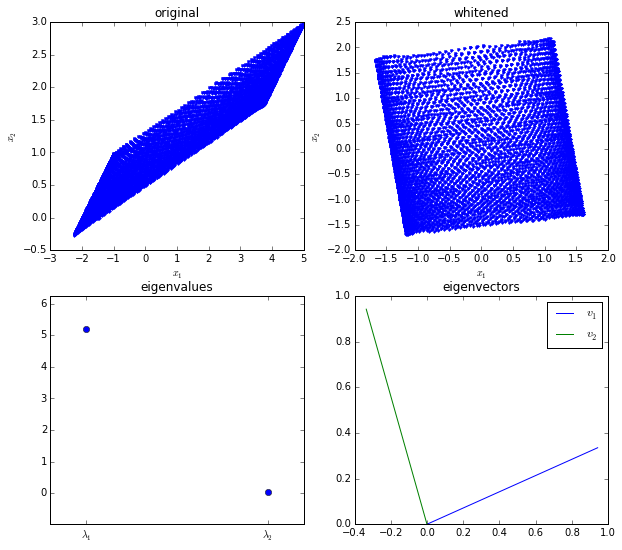

In [2]:
from src import pt25ica
pt25ica.plotwhitened()

#### Question 13

*bare å vise lik.hood for PPCA som er normal?? og ica finner parametre som maximerer non-normalilty, obvious??*

#### Question 14

Here I follow Hyvärinen & Oja (2000) and implement the four first steps in section 6.1 with addition of (44) in section 6.2 to recover more than one component (the same procedure as outlined in the Wiki article on FastICA - which is what I implement)

In the ICA model we assume our mixed observations are generated by (remember the data is whitened) $\mathbf X = \mathbf {W'S}$ where in our case $\mathbf W'$ is the $2 \times 2$ mixing matrix where the first row contains the mixing coefficients for the first mixture  (orthogonal by the whitening process, i.e. the inverse of the un-mixing matrix: $\mathbf W^{-1} = \mathbf W'$) and $\mathbf S$ is the $2 \times 5000$ independent signal observation matrix.

Hyvärinen & Oja (2000) estimate $\mathbf W$ by maximising the (approximated) negentropy of  the unmixed data $\mathbf {WX}$, where negentropy can be measured by several non-linear functions (I used the recommended $g(u) = -\mathop{exp}(-u^2/2)$, the results where the same with the other choices).

This is done by fixed point iteration, for each independent component we wish to estimate, we iteratively update the i'th components weight vector based on Newtons method, and normalize the vector to unit length. Since we are estimating more than one component weight vector, we need to make sure this one does not converge to the same maximum as the first one, so it has to be decorrelated. For the second component this extra step is performed in every fixed point iteration, and I follow the simplest alternative which is that given by (44) in Hyvärinen & Oja (2000)

The resulting plots are shown below. The first panel shows the reconstructed signals, the lower panel shows the distribution of the unmixed signals, and the two estimated mixing vectors (i.e. the two rows in the transpose of the un-mixing matrix)

*ser ikke poenget med å bare repetere likninger her..*

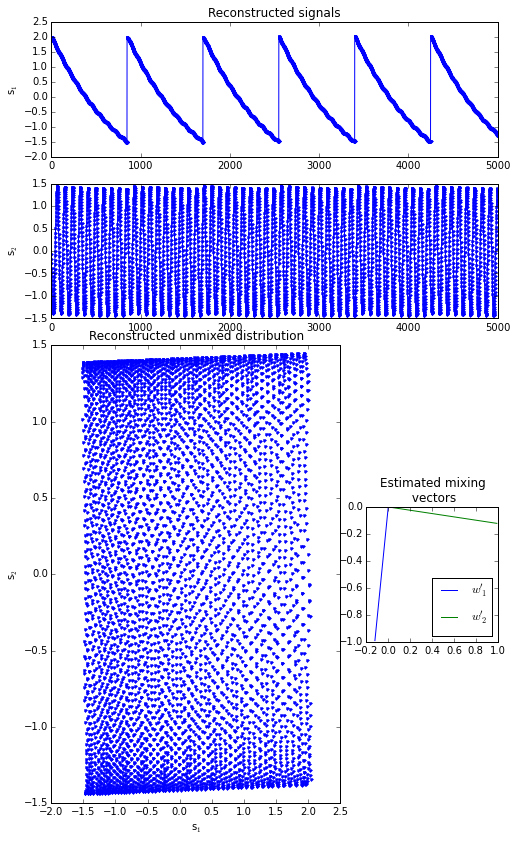

In [4]:
pt25ica.plotfica()

#### 2.6 Implementation of Latent Dirichlet Allocation